# Attributive participial clauses in English and learner English
## Elizaveta Kuzmenko

*the project repository can be found [here](https://github.com/ElizavetaKuzmenko/project_R)*

Participles in English can form attributive clauses that look like this: _the boy playing with the kitten, the people involved_. Typically single participles stand before nouns, while participial clauses stand after nouns, though there are some exceptions like _people involved_. In my project I want to:

1. Check and describe the position of participial clauses in native English with regard to the noun.

2. Compare it to the use of participial clauses in learner English.

3. Detect the conditions in learner English in which a participle or a participial clause is used most frequently with a wrong position.

**Categorical input**: voice, verb lemma, head noun lemma.
**Numeric input**: length of clause in words, distance from the head noun.

**Dependent variables**: position, type.

**Hypotheses**:

1. Language learners are likely to put the construction in wrong position, e.g. _a dressed in black man_ (correct - _a man dressed in black_), _the involved people_ (correct -- _the people involved_) due to the interference with their native language.

2. The formation of a relative clause instead of a participial construction depends on the length of the clause (the longer the unit is, the more likely it is to be used as a relative clause).

# Collecting data

I have chosen BNC and REALEC as my sources of data. BNC represents L1 (native language) data, and REALEC represents L2 (learner language) data.

For my research I need to construct 2 datasets:

1. Usage cases for attributive participial construction in the L1 corpus: this dataset ideally includes all the cases when a participial construction is used. It is needed to describe the characteristics of a participial construction and the factors when choosing the type and the position of a construction with regard to the head noun.
2. Usage cases for attributive participial construction in the L2 corpus: this dataset also includes all the cases when a participial construction is used. The purpose of this dataset is to provide data for comparison between L1 and L2.
3. Errors in using attributive participial constructions. This dataset includes all cases when the construction was erroneously used in L2 corpus. This dataset is neede to investigate the factors that trigger an error in the construction.

## Collecting datasets 1 and 2

First I need to collect all the cases when a participle or gerund is used in an attributive clause. The steps I have taken to do this include the following (workflow is identical for both BNC and REALEC):

* First I need to clear the file from all markup and metadata and get raw text. The size of BNC on this step was **13 862 525** tokens and the size of REALEC was **1 211 760** tokens.
* Then I can parse this text to get syntactic analyses of all sentences. To do this, I used [UDPipe tool](http://ufal.mff.cuni.cz/udpipe) and trained my model on [Universal Dependencies for English](https://github.com/UniversalDependencies/UD_English) with default settings.
* After that I set out to extract all constituents that have a verbal form as a head and form __acl__ or __amod__ relations. __acl__ stands for clausal modifier (*a child frightened to death*) and __amod__ stands for adjectival modifier (*a frightened child*). This and the following steps were performed using Python (a script is available [here](https://github.com/ElizavetaKuzmenko/project_R/blob/master/scripts/parse_corpora.py)) and also in the repository.
* Having extracted such constituents, I retrieved input features from the data. The resulting data are placed in the repository and can be found [here for BNC](https://github.com/ElizavetaKuzmenko/project_R/blob/master/BNC_data.csv) and [here for REALEC](https://github.com/ElizavetaKuzmenko/project_R/blob/master/REALEC_data.csv).
* **Disclaimer!** The present research does not address the issue of parsing non-standard languages. The parser is most likely to make errors when parsing learners' data, but I just take it as is.

In the result, my dataframe for BNC consisted of **170 883** points of observation. The dataframe for REALEC consisted of **15 235** points of observation.

I decided to choose a fraction of these data, because working with such a large dataframe in R would be too slow, and also the comparison of L1 and L2 data would be more fair if the number of observation points was identical. Thus, I randomly chose 10 000 observation points from BNC and REALEC.

Let's look at the data and prove the concept of this research:

In [1]:
options(repr.plot.width=4, repr.plot.height=3)
library(tidyverse)
library(ggplot2)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
bnc <- read.csv("BNC_data_sample.csv", sep='\t')

In [4]:
head(bnc, n = 10)

id,binary.position,binary.voice,distance,head.lemma,length,position,text,type,verb.lemma,voice
102030,0.0,0.0,1.0,example,8,after,producing a less demanding and more compliant patient,part,produce,active
131371,1.0,1.0,2.0,shelf,1,before,darkened,part,darken,passive
61115,1.0,1.0,2.0,blocks,3,before,sharply - defined,part,defin,passive
44765,0.0,None,2.0,stone,11,after,to give it almost the appearance of some natural rock formation,to,give,None
132680,0.0,1.0,1.0,code,5,after,revised for BNC - 2,part,revis,passive
1262,1.0,0.0,1.0,citie,1,before,existing,part,exist,active
164931,0.0,1.0,1.0,hand,4,after,reached for the light,part,reach,passive
120043,0.0,1.0,1.0,procedure,10,after,carried out in the surgical unit of your local hospital,part,carry,passive
152122,0.0,None,2.0,means,9,after,to secure and enhance working - class living standards,to,secure,None
146598,0.0,None,2.0,person,11,after,to expose the punitive nature of John Smith 's shadow Budget,to,expose,None


In [55]:
summary(bnc) # summary is not very informative, but just for fun...

       id        binary.position  binary.voice     distance      head.lemma  
 passive:  297   0.0    :6226    1.0    :4871   1.0    :4462          : 792  
 active :  215   1.0    :3688    0.0    :3645   2.0    :2655   way    : 115  
 None   :   88          : 600    None   :1493          : 761   None   :  86  
 part   :   24   None   :  99           : 723   3.0    : 635   time   :  83  
 rel    :    8   passive:  68    passive:  19   4.0    : 437   code   :  79  
 to     :    6   active :  42    active :  10   5.0    : 318   s-unit :  74  
 (Other):10149   (Other):  64    (Other):  26   (Other):1519   (Other):9558  
     length        position                          text           type     
 1      :2525   after  :6223                           : 925   part   :7643  
 3      :1162   before :3671   following               :  63   to     :1299  
 4      :1033          : 784   growing                 :  46          : 853  
 2      : 857   None   :  87   added                   :  43   r

In [3]:
bnc_num_after = nrow(filter(bnc, position == 'after')) # plot for BNC
bnc_num_before = nrow(filter(bnc, position == 'before'))
bnc_position = filter(bnc, position == 'after' | position == 'before')
print(bnc_num_after)
print(bnc_num_before)
plot1 <- ggplot(data=bnc_position, aes(position)) + 
geom_bar(stat="count") + 
ggtitle("Position of attributive participial construction with\nregard to the head noun in BNC") + 
theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")
#plot1

[1] 6246
[1] 3669


As we can see, there is more participial clauses that stand after the head noun than before it in L1 data. What about L2 data?

In [4]:
realec <- read.csv("REALEC_data_sample.csv", sep='\t')

In [24]:
real_num_after = nrow(filter(realec, position == 'after')) # plot for REALEC
real_num_before = nrow(filter(realec, position == 'before'))
realec_position = filter(realec, position == 'after' | position == 'before')
print(real_num_after)
print(real_num_before)
plot2 <- ggplot(data=realec_position, aes(position)) + 
geom_bar(stat="count") + 
ggtitle("Position of attributive participial construction with\nregard to the head noun in REALEC") + 
theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")
#plot2

[1] 7001
[1] 2933


In L2 data too clauses standing after the head noun are more frequent. Let's plot the data from the two corpora together, for greater clarity.

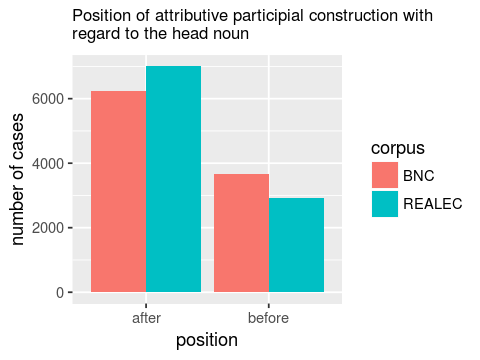

In [6]:
combined1 <- bnc_position
combined1$corpus <- rep('BNC', nrow(bnc_position))
combined2 <- realec_position
combined2$corpus <- rep('REALEC', nrow(realec_position))
combined <- rbind.data.frame(combined1, combined2)
plot3 <- ggplot(data=combined, aes(position, fill=corpus)) + 
geom_bar(stat="count", position='dodge') + 
ggtitle("Position of attributive participial construction with\nregard to the head noun") + 
theme(plot.title = element_text(size=10)) + ylab("number of cases") + xlab("position")
plot3

The difference between numbers in REALEC seems to be more different than in BNC. But are these numbers really different? The null hypothesis is that there is no factor that influences the difference between REALEC and BNC. The hypothesis is that there is such a factor.

In [63]:
position <- matrix(c(bnc_num_after, real_num_after, bnc_num_before, real_num_before), nrow = 2)
rownames(position) <- c('bnc', 'realec')
colnames(position) <- c('after', 'before')
position

,after,before
bnc,6223,3671
realec,7001,2933


In [66]:
chisq.test(position)


	Pearson's Chi-squared test with Yates' continuity correction

data:  position
X-squared = 127.82, df = 1, p-value < 2.2e-16


OK, it seems the hypothesis is correct and our investigation could have some sense.

# Step 1: exploratory analysis of L1 data

**Task: Check and describe the position of participial clauses in native English with regard to the noun.**

### Length and position

First, let's check how length of a participial clause influences the position of a clause. It is obvious that in L1 data longer units stand after the head noun (typically, all extended participial clauses), whereas single participles are placed before the noun.

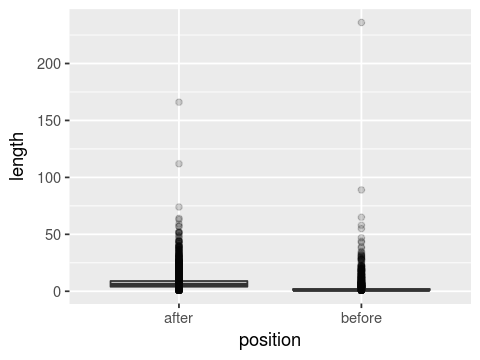

In [6]:
plot4 <- ggplot(data = bnc_position, aes(position, length)) +
  geom_boxplot(outlier.alpha = 0.1)+
  geom_point(alpha = 0.1)
plot4
# compute lower and upper whiskers
#ylim1 = boxplot.stats(realec_position$length)$stats[c(1, 5)]

# scale y limits based on ylim1
#p1 = plot4 + coord_cartesian(ylim = ylim1*1.05)
#p1

Median value for clauses after noun is higher than for clauses before noun. This is exactly the case for BNC data, though some extended clauses are nevertheless found before the noun. Overall, a length of a clauses varies significantly from 1 (single participle) to 100 and more, so a confidence interval cannot be determined correctly. However, there is a significant number of outliers that stand before the head noun, though their length is more than 10 words.

What about REALEC data?

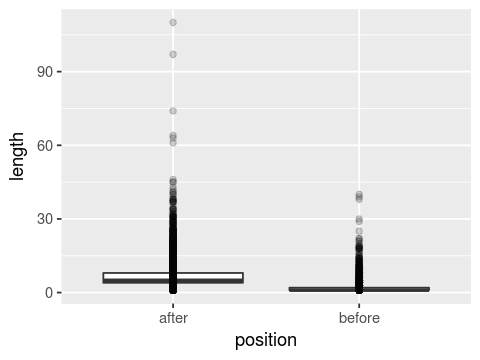

In [29]:
plot5 <- ggplot(data = realec_position, aes(position, length)) +
  geom_boxplot(outlier.alpha = 0.1)+
  geom_point(alpha = 0.1)
plot5

The picture in REALEC is even more consistent than it is in BNC. Once again, the majority of long clauses stand after the head noun, and all outliers (clauses that are very long) are also found after the head noun. However, as in BNC, there are some clauses of length above 10 that stand before the noun.


Now let's take a look at the interdependence of voice and position in a sentence.

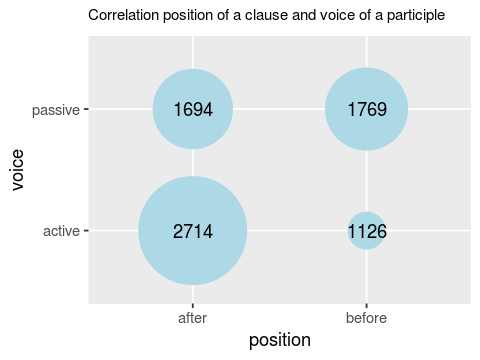

In [39]:
plot6 <- realec_position %>% filter(voice == 'passive' | voice == 'active') %>% group_by(position, voice) %>% summarise(number = n()) %>% 
  ggplot(aes(position, voice, label=number)) + 
  geom_point(aes(size = number), colour="lightblue") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("voice") + 
  ggtitle("Correlation position of a clause and voice of a participle") + 
  theme(plot.title = element_text(hjust = 0, size = 9))
plot6

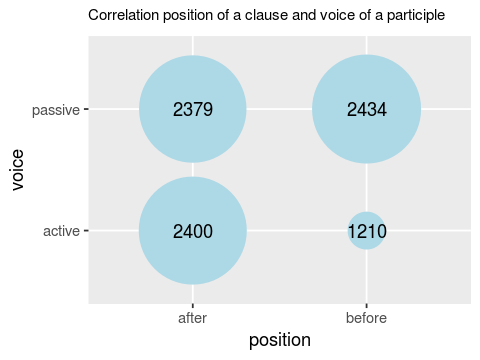

In [40]:
plot6 <- bnc_position %>% filter(voice == 'passive' | voice == 'active') %>% group_by(position, voice) %>% summarise(number = n()) %>% 
  ggplot(aes(position, voice, label=number)) + 
  geom_point(aes(size = number), colour="lightblue") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("voice") + 
  ggtitle("Correlation position of a clause and voice of a participle") + 
  theme(plot.title = element_text(hjust = 0, size = 9))
plot6

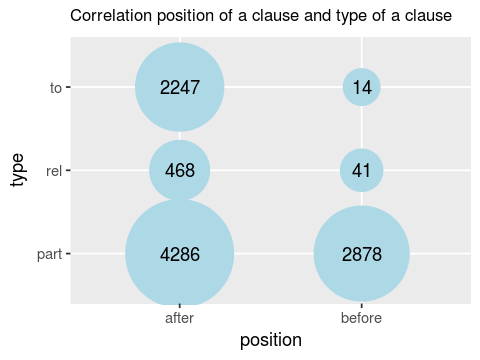

In [11]:
plot7 <- realec_position %>% group_by(position, type) %>% summarise(number = n()) %>% 
  ggplot(aes(position, type, label=number)) + 
  geom_point(aes(size = number), colour="lightblue") + 
  geom_text() + scale_size(range = c(10, 30)) + guides(size = F) + 
  xlab("position") + ylab("type") + 
  ggtitle("Correlation position of a clause and type of a clause") + 
  theme(plot.title = element_text(hjust = 0, size = 10))
plot7

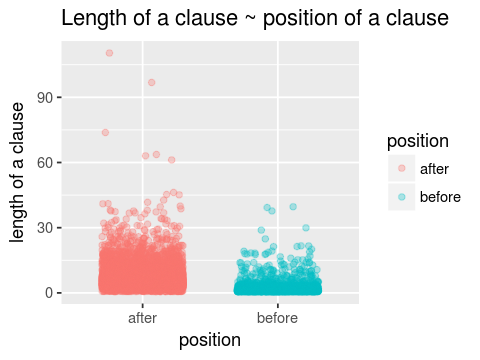

In [27]:
realec_position %>% 
  ggplot(aes(position, length, color = position))+
  geom_jitter(width = 0.3, alpha = 0.3)+
  labs(title = "Length of a clause ~ position of a clause",
       x = "position",
       y = "length of a clause")